# Assignment 02 – Generative and Non-Generative Methods

#### Team number - Your FirstName LastName - GUID
#### Team number - Your FirstName LastName - GUID
#### Team number - Your FirstName LastName - GUID

# Initialization 

## Load the packages and dataset. (0.5 x 2)

In [44]:
#import packages

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib import rcParams
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, recall_score, confusion_matrix,  plot_confusion_matrix, classification_report
random.seed(7992)

In [45]:
# load dataset

import urllib.request
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
filename = 'datasets/online_shoppers_intention.csv'
urllib.request.urlretrieve(url, filename)

('datasets/online_shoppers_intention.csv',
 <http.client.HTTPMessage at 0x19b8d99c220>)

## Show first 6 data points using head(). (0.5 x 2)

In [46]:
import pandas as pd
filename = 'datasets/online_shoppers_intention.csv'
OSI = pd.read_csv(filename, header=0)
OSI["Weekend"] = OSI["Weekend"].astype(int)
OSI["Revenue"] = OSI["Revenue"].astype(int)
OSI.insert(loc=16, column="VisitorTypeNumeric", value=pd.factorize(OSI['VisitorType'])[0] + 1)
OSI = OSI.drop('VisitorType', 1)

OSI.head(6)

C:\Users\admin\AppData\Local\Temp\ipykernel_12428\1096484151.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  OSI = OSI.drop('VisitorType', 1)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,1,0,0


## Describe the Dataframe by using describe. (0.5 x 2) 

In [47]:

OSI.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

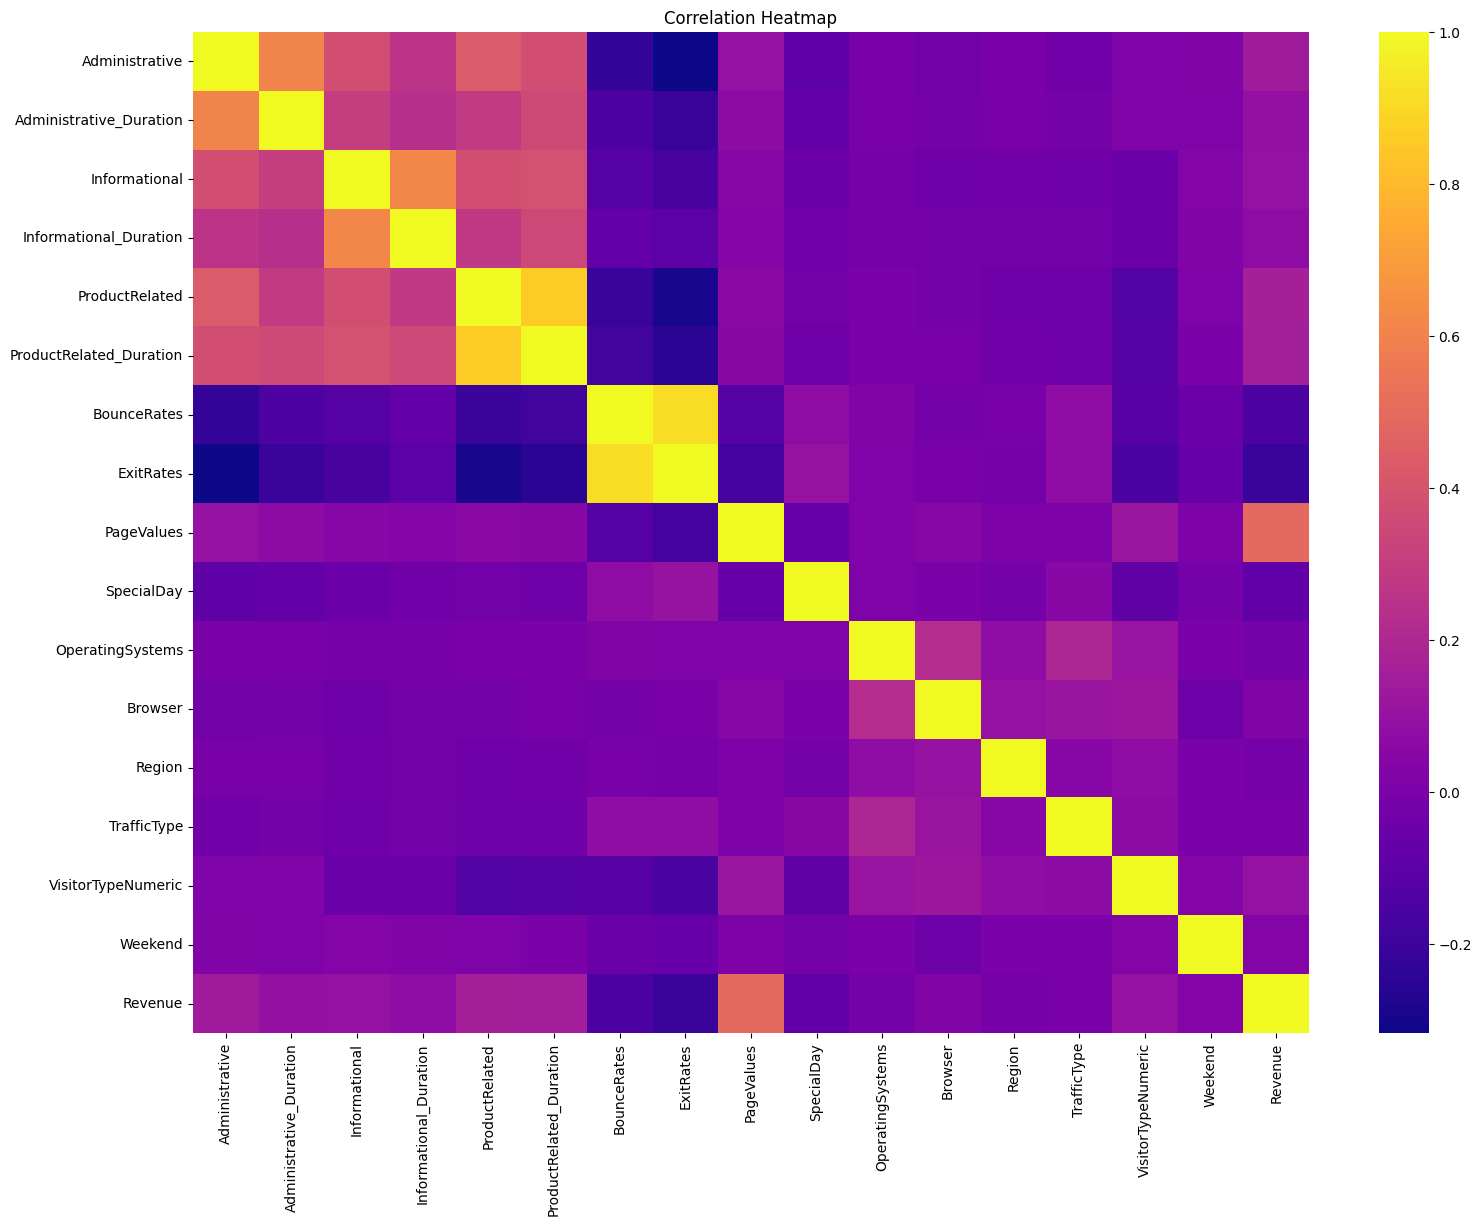

In [48]:

# Calculate the correlation matrix
correlation_matrix = OSI.corr()

# Heat map
plt.figure(figsize = (18,13))
sns.heatmap(correlation_matrix, cmap = 'plasma').set(title = 'Correlation Heatmap')
plt.show()

## Show the distribution plots of each variable using hist function from pandas+matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variables seems to be skewed towards left.”* (0.5 x 2) 


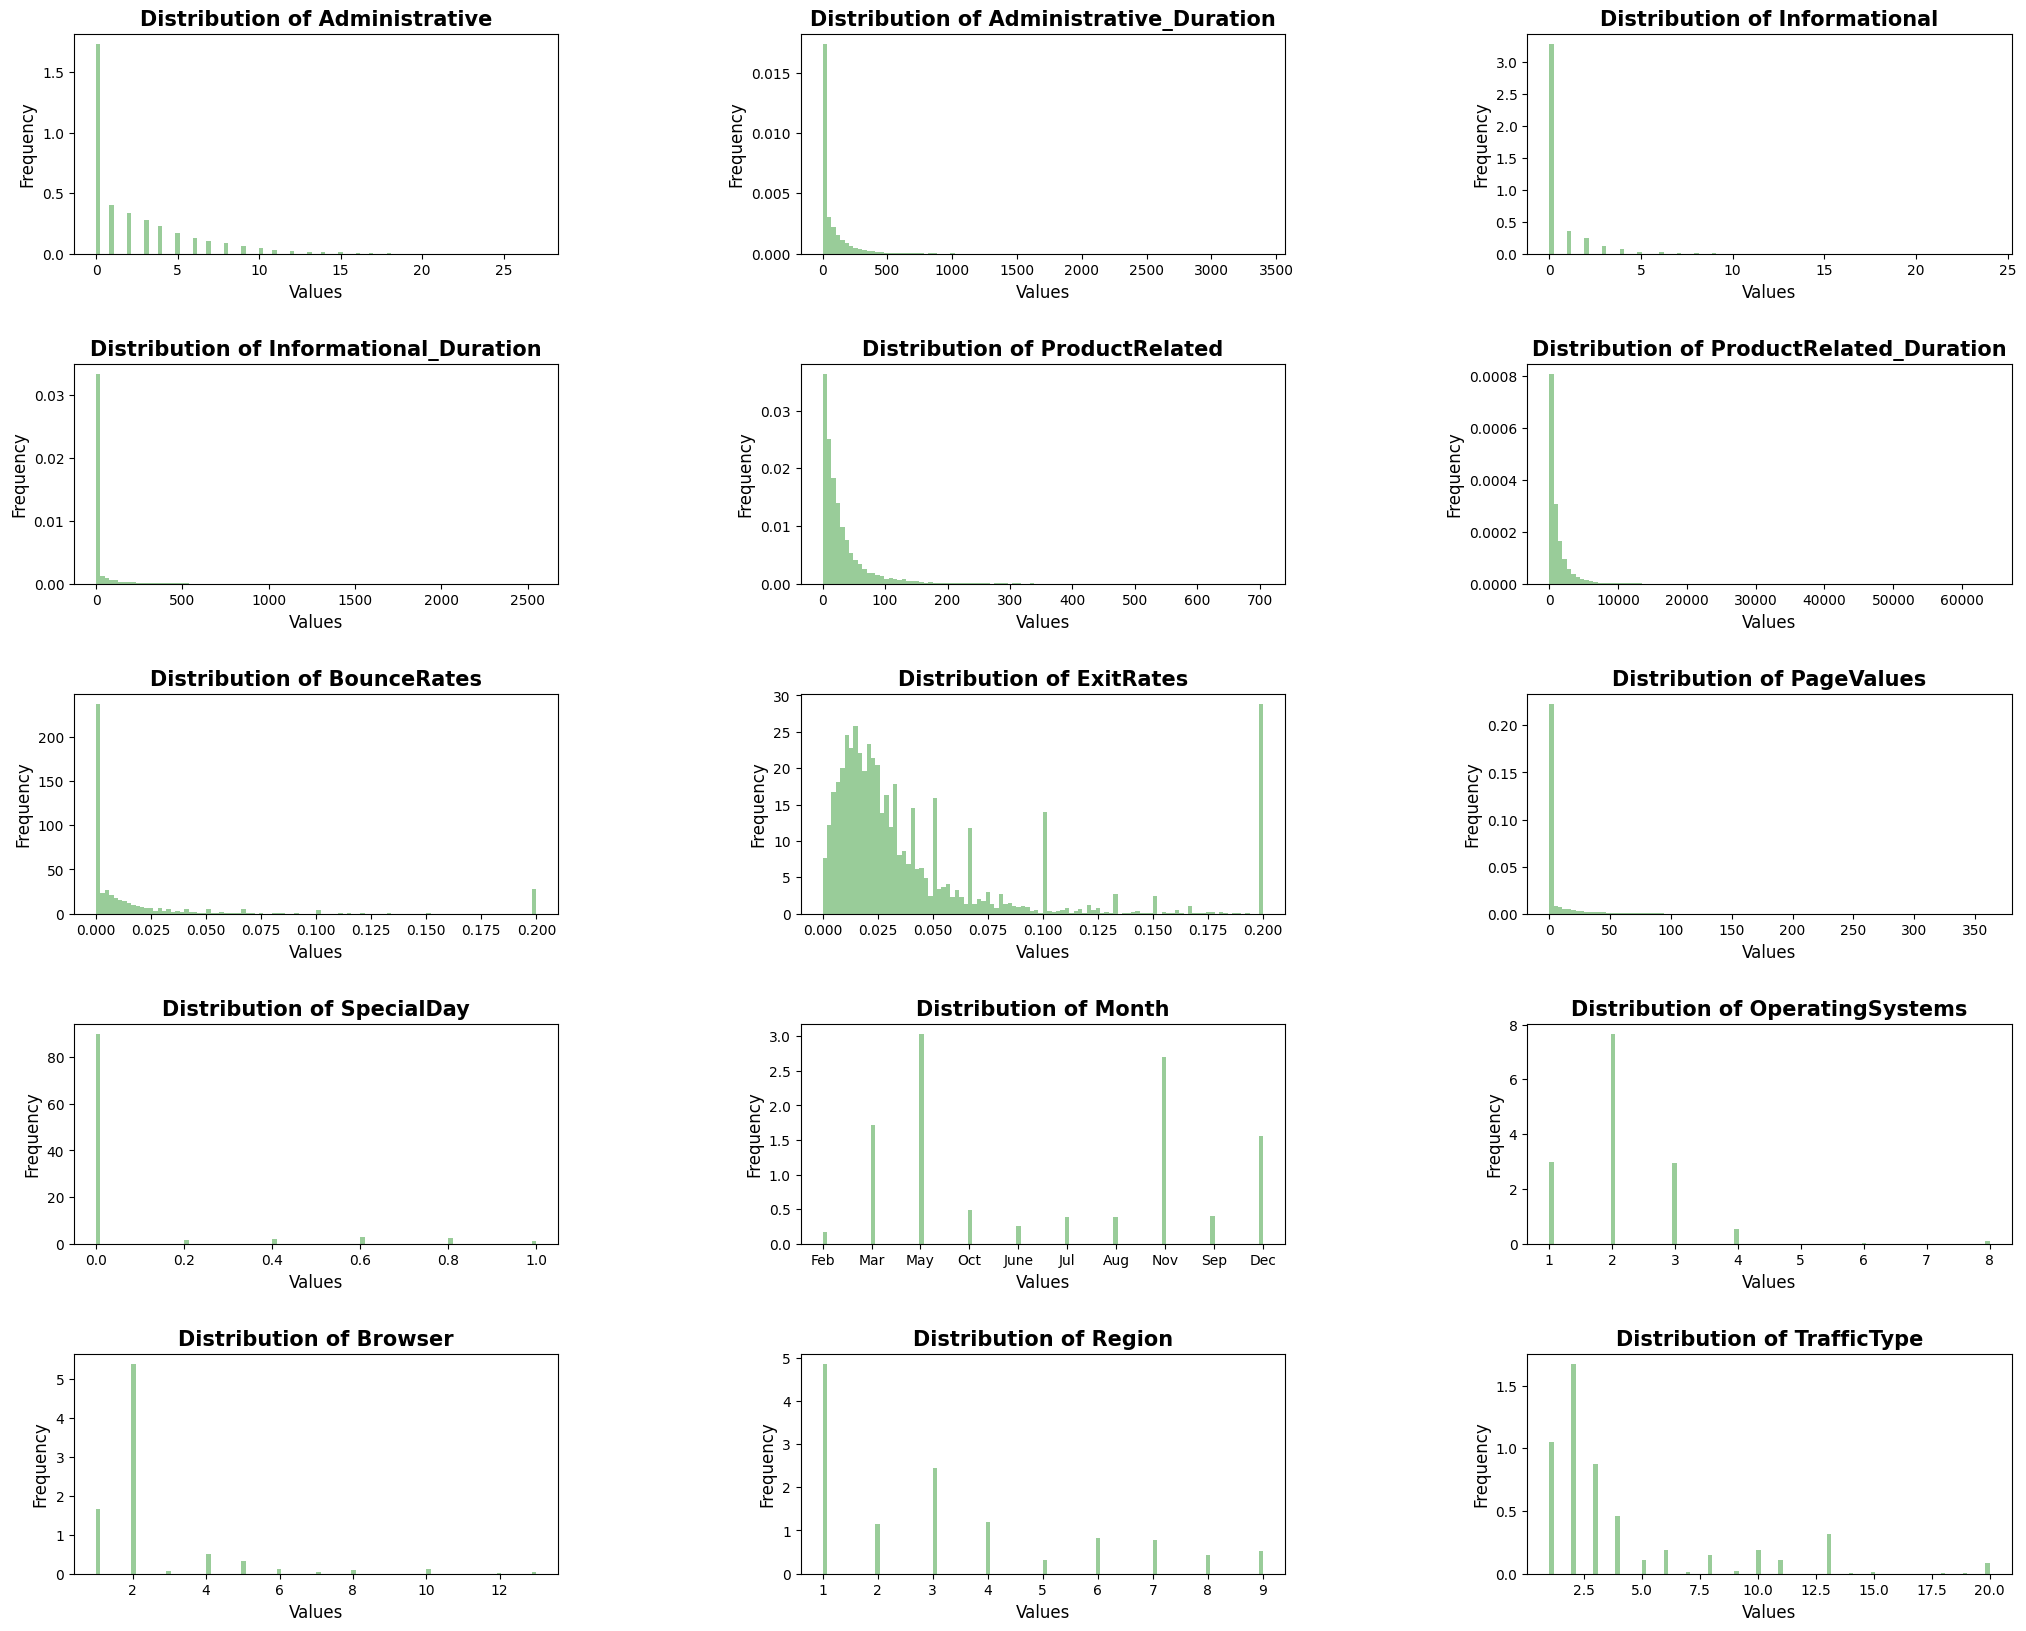

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5,3,figsize = (25,20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
col_array = OSI.columns.values.reshape(6,3)
for i,row in enumerate(col_array[:-1]):
    for j, col in enumerate(row):
        ax[i,j].hist(OSI[col],density=True, bins=100, alpha=0.4,color="Green");
        ax[i,j].set_title(f'Distribution of {col}', fontsize=15, weight = "bold")
        ax[i,j].set_xlabel('Values', fontsize=12)
        ax[i,j].set_ylabel('Frequency', fontsize=12)
plt.show()

# By analyzing the distribution plots, we can deduce that majority of the variables are skewed to the right, however, some of the variables have a gap between the bins which alludes to the fact that variables are categorical in nature.

## Load the dataset. (0.5 x 2)

In [50]:
import pandas as pd
filename = 'datasets/Bike-Sharing-Hour.csv'
BSH = pd.read_csv(filename, header=0)

## Show first 6 data points using head(). (0.5 x 2)

In [51]:
import pandas as pd
BSH.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


## Describe the Dataframe by using describe. (0.5 x 2) 

In [52]:
BSH.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

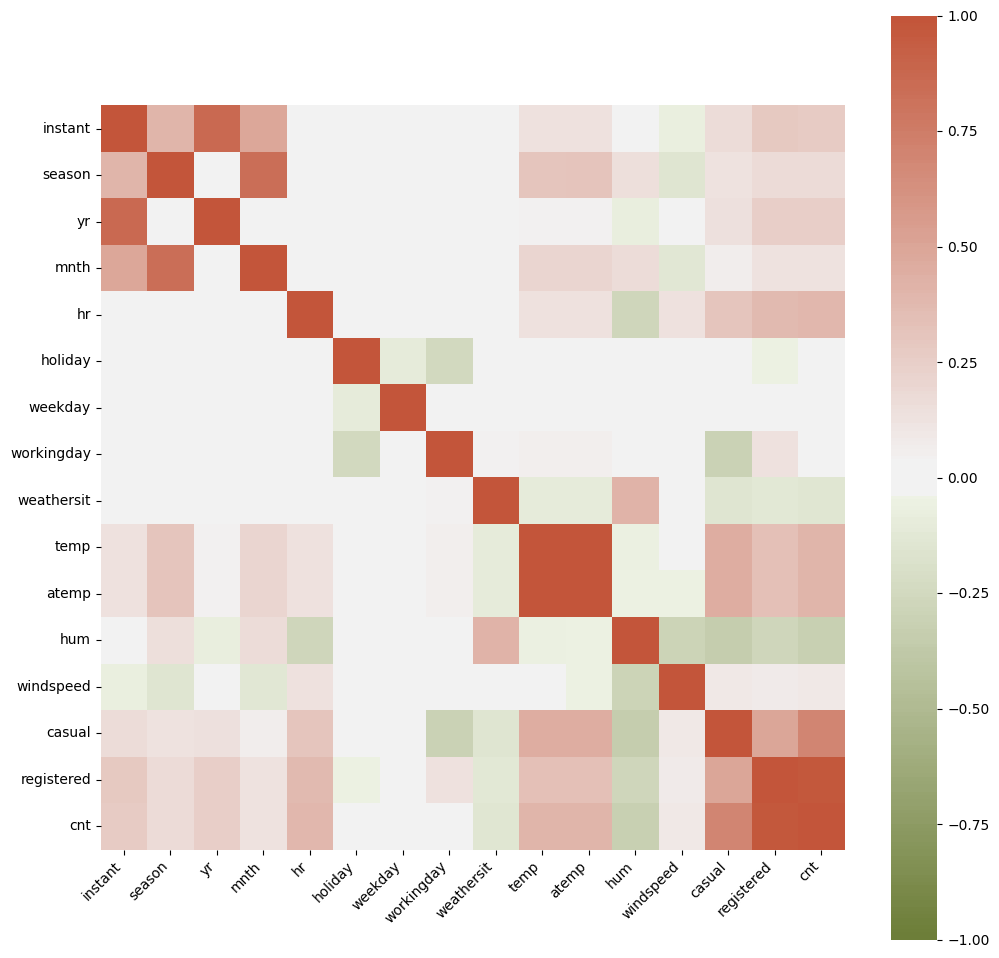

In [53]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr = BSH.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(100, 20, sep=10, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Show the distribution plots of each variable using hist function from pandas+matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


array([[<AxesSubplot: title={'center': 'instant'}>,
        <AxesSubplot: title={'center': 'season'}>,
        <AxesSubplot: title={'center': 'yr'}>,
        <AxesSubplot: title={'center': 'mnth'}>],
       [<AxesSubplot: title={'center': 'hr'}>,
        <AxesSubplot: title={'center': 'holiday'}>,
        <AxesSubplot: title={'center': 'weekday'}>,
        <AxesSubplot: title={'center': 'workingday'}>],
       [<AxesSubplot: title={'center': 'weathersit'}>,
        <AxesSubplot: title={'center': 'temp'}>,
        <AxesSubplot: title={'center': 'atemp'}>,
        <AxesSubplot: title={'center': 'hum'}>],
       [<AxesSubplot: title={'center': 'windspeed'}>,
        <AxesSubplot: title={'center': 'casual'}>,
        <AxesSubplot: title={'center': 'registered'}>,
        <AxesSubplot: title={'center': 'cnt'}>]], dtype=object)

<Figure size 2100x2100 with 0 Axes>

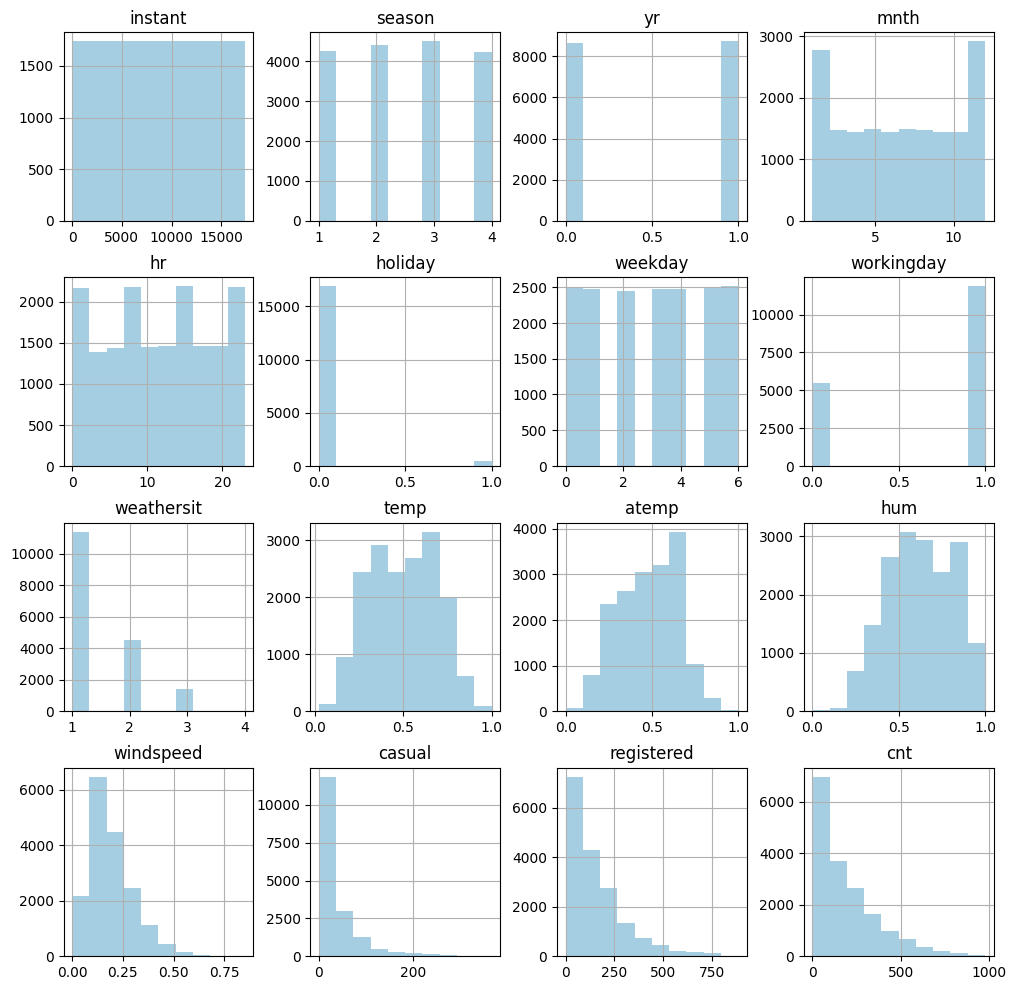

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14),dpi=150)
BSH.hist()

# Intermediate Steps (Essential, no points granted)

In [55]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from time import strptime

#drop na values from whole dataset
OSI = OSI.dropna()
#encode "Month" column from categorical variable to dummy variables
#OSI_encode = pd.get_dummies(OSI, columns = ['Month'])

#reformat Month column all values to 3-letter abbreviations.
OSI['Month'] = OSI['Month'].str.replace('June','Jun')
#convert Month from str to int
OSI['Month'] = pd.to_datetime(OSI.Month, format='%b').dt.month.astype(str)

X_OSI = OSI.loc[:, OSI.columns != 'Revenue'].to_numpy()
y_OSI = OSI.loc[:, OSI.columns == 'Revenue'].to_numpy()

# print(X_OSI)
# print(Y_OSI)

OSIX_train, OSIX_test, OSIy_train, OSIy_test = train_test_split(X_OSI, y_OSI, test_size=0.30, random_state=0, )

In [56]:
#Clean dteday column:
BSH['dteday'] = pd.to_datetime(BSH['dteday'])
BSH['year'] = BSH['dteday'].dt.year
BSH['month'] = BSH['dteday'].dt.month
BSH['day'] = BSH['dteday'].dt.day
BSH = BSH.drop(columns=['dteday'])

X_BSH = BSH.iloc[:, BSH.columns != 'cnt'].to_numpy()
y_BSH = BSH.iloc[:,-1:].to_numpy()

# print(X_BSH)
print(X_BSH)
#Split train test
BSHX_train, BSHX_test, BSHy_train, BSHy_test = train_test_split(X_BSH, y_BSH, test_size=0.30, random_state=0)
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable to convert class labels to integers starting from 0
BSHy_train = label_encoder.fit_transform(BSHy_train)

BSHy_test = label_encoder.fit_transform(BSHy_test)




[[1.0000e+00 1.0000e+00 0.0000e+00 ... 2.0110e+03 1.0000e+00 1.0000e+00]
 [2.0000e+00 1.0000e+00 0.0000e+00 ... 2.0110e+03 1.0000e+00 1.0000e+00]
 [3.0000e+00 1.0000e+00 0.0000e+00 ... 2.0110e+03 1.0000e+00 1.0000e+00]
 ...
 [1.7377e+04 1.0000e+00 1.0000e+00 ... 2.0120e+03 1.2000e+01 3.1000e+01]
 [1.7378e+04 1.0000e+00 1.0000e+00 ... 2.0120e+03 1.2000e+01 3.1000e+01]
 [1.7379e+04 1.0000e+00 1.0000e+00 ... 2.0120e+03 1.2000e+01 3.1000e+01]]


d:\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Classification (total 48)
## AdaBoost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [57]:
from sklearn.ensemble import AdaBoostClassifier
#import AdaBoostClassifier algorithm scikit-learn's generative ensemble method 

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [58]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0, base_estimator=None,learning_rate=1, algorithm='SAMME.R' )
# create model clf with AdaBoostClassifier
#n_estimators is the number of weak learners to train iteratively. We are choosing 100.
#base_estimator is the learning algorithm to use to train the weak models. We are choosing default algorithem of DecisionTreeClassifier.
#learning_rate is the weight of each boosting iteration. We are choosing default value of 1.


### Train classifier on train data and explain what you did. (1.5) 

In [59]:
ada_fit = clf.fit(OSIX_train, OSIy_train)
# fit the train and test dataset with AdaBoostClassifier that is defined above.

d:\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test/fit classifier test data and explain what you did. (1.5)

In [60]:
OSIy_pred = ada_fit.predict(OSIX_test)
# predict target variable with test dataset

### Calculate accuracy and explain what you did. (1.5)

In [61]:
print(classification_report(OSIy_test, OSIy_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3077
           1       0.67      0.54      0.60       622

    accuracy                           0.88      3699
   macro avg       0.79      0.74      0.76      3699
weighted avg       0.87      0.88      0.87      3699



### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


<Figure size 187.5x187.5 with 0 Axes>

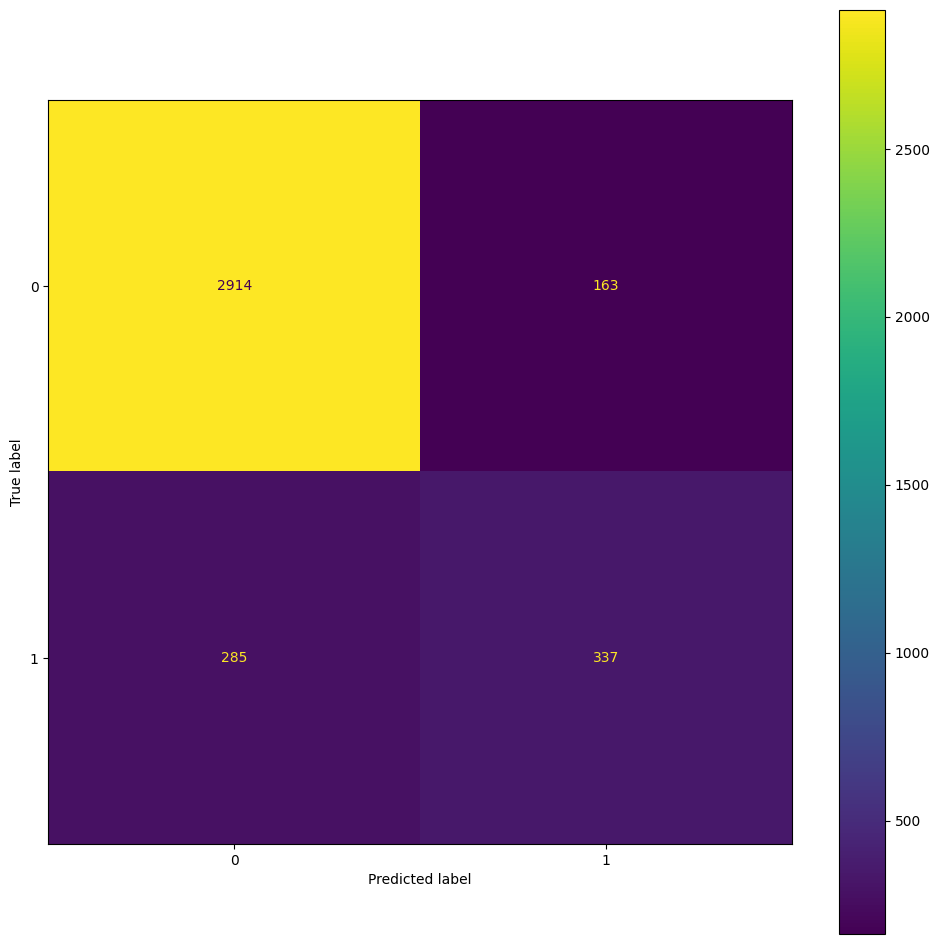

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette

plt.figure(figsize=(2.5,2.5),dpi=75)
set_palette("Paired")

conf_matrix = confusion_matrix(OSIy_test, OSIy_pred)
ConfusionMatrixDisplay.from_estimator(ada_fit, OSIX_test, OSIy_test)

### Repeat the same with a different parameter set and compare the result with (2)


## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
#import GradientBoosting classification algorithm scikit-learn's generative ensemble method 

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [64]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=0, criterion='friedman_mse', init=None)
# create classification model clf with GradientBoostingClassifier
# n_estimators: the number of trees to construct. We choose 100 here.
#learning_rate: the contribution of each tree. we choose 0.1 to shrink the learning step.
#max_depth: the maximum depth of each tree. we choose 2 here.
#criterion: The loss function used to find the optimal feature and threshold to split the data. we choose 'friedman mean of sq error function'.
#init: the initial estimator. we set it to default of log(odds).


### Train classifier on train data and explain what you did. (1.5) 

In [65]:
gradientboost_fit = clf.fit(OSIX_train, OSIy_train)
# fit model clf with training dataset

d:\Python\Python38\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test/fit classifier test data and explain what you did. (1.5)

In [66]:
OSIy_pred = gradientboost_fit.predict(OSIX_test)
# predict target variable with test dataset

### Calculate accuracy and explain what you did. (1.5)

In [67]:
print(classification_report(OSIy_test, OSIy_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3077
           1       0.72      0.56      0.63       622

    accuracy                           0.89      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.88      0.89      0.88      3699



### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


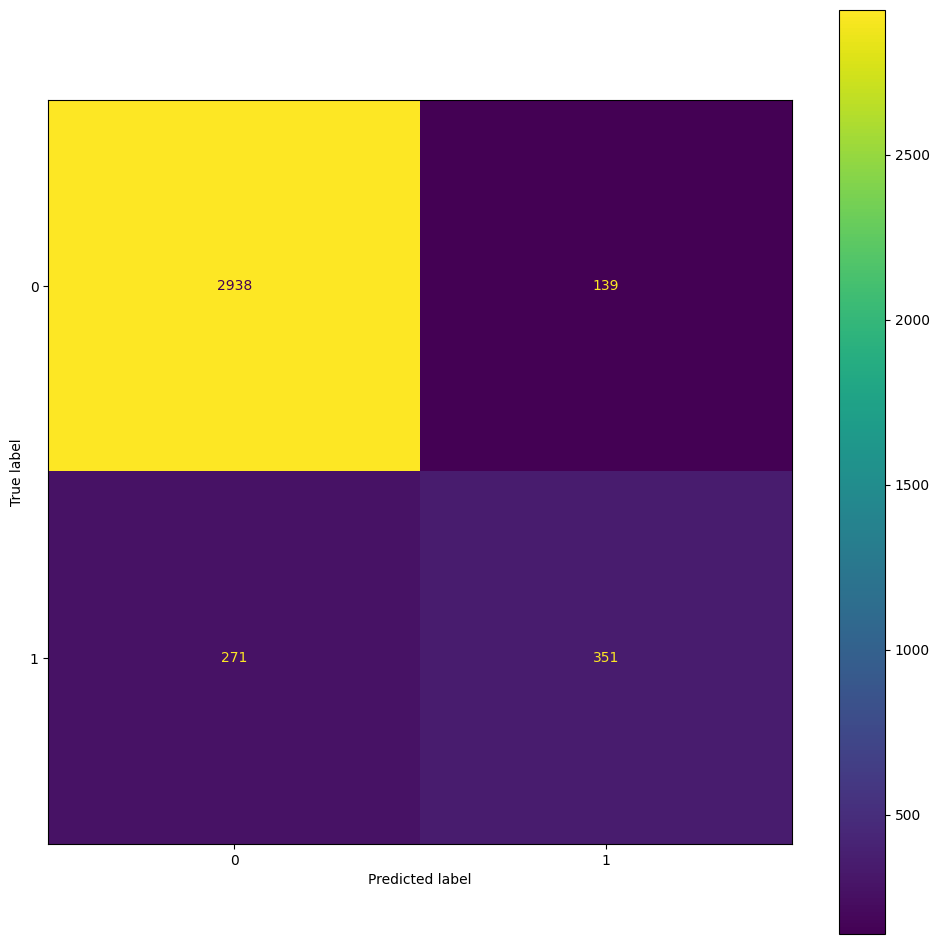

In [68]:
cm = confusion_matrix(OSIy_test,OSIy_pred,labels= clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### Repeat the same with a different parameter set and compare the result with (2)


## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [69]:
#!pip install xgboost
# install xgboost module from pip
import xgboost
#import xgboost 
from xgboost import XGBClassifier
#import xgboostclassifier


### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [70]:
clf = XGBClassifier(objective='multi:softprob', num_class=2, max_depth=2, learning_rate=1,n_estimators=100)
# create classification model clf with XGBClassifier
# objective: objective function is used for multi-class or binary-class classification, returning a probability score for each class. we are chossing the function as "multi:softprob" which is multi-class 
# num_class: used for multi-class classification to represents the number of classes in the dataset. _________________?
# max_depth: represents the maximum depth of each decision tree. We are choosing 2 here
# n_estimators: the number of trees to construct. We choose 100 here.
#learning_rate: the contribution of each tree. we choose 1 

### Train classifier on train data and explain what you did. (1.5) 

In [71]:
xgboost_fit = clf.fit(OSIX_train, OSIy_train)
# fit model clf with training dataset

### Test/fit classifier test data and explain what you did. (1.5)

In [72]:
OSIy_pred = xgboost_fit.predict(OSIX_test)
# predict target variable with test dataset

### Calculate accuracy and explain what you did. (1.5)

In [73]:
# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(OSIy_test, OSIy_pred)
# print("Accuracy:", accuracy)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## Bagging
### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [74]:
from sklearn.ensemble import BaggingClassifier
#import  classification algorithm scikit-learn's generative ensemble method 

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [75]:
clf = BaggingClassifier(base_estimator=None, n_estimators=50, max_samples=1, bootstrap=True, bootstrap_features=False, random_state=1)
#base_estimator: The base estimator to fit on random subsets of the dataset. we are choosing default estimator decision tree estimator.
#n_estimators: number of estimators in the sample for bagging. we are choosing 50 here.
#max_samples: The number of samples to draw from training dataset to train each base estimator. we use default value 1 here
#bootstrap: Whether samples are drawn with replacement. we choose true, sampling with replacement.
#bootstrap_features: Whether features are drawn with replacement. we choose default False - draw features without replacement
#random_state: for reproducible output across multiple function call in order to control the random resampling of the dataset. we put 1 here

### Train classifier on train data and explain what you did. (1.5) 

In [76]:
bagging_fit = clf.fit(OSIX_train, OSIy_train)
#fit bagging model with clf model created above

d:\Python\Python38\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test/fit classifier test data and explain what you did. (1.5)

In [77]:
OSIy_pred = bagging_fit.predict(OSIX_test)
# predict target variable with test dataset 

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


# Regression (22 Points)
## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
#Import gradient boost regressor from scikit-learn for gradient boost model

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [79]:
clf = GradientBoostingRegressor(max_depth=3,random_state=0)
#clf is created and the max_depth is chosen as 3 which limits the number of nodes in the tree, random state is 0, every parameters remains default.

### Train classifier on train data and explain what you did. (1.5) 

In [80]:
gradientboost_fit = clf.fit(BSHX_train, BSHy_train)


### Test/fit classifier test data and explain what you did. (1.5)

In [81]:

BSHy_predict = gradientboost_fit.predict(BSHX_test)


### Calculate accuracy and explain what you did. (1.5)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#import accuracy calculation library for regression models
mae = mean_absolute_error(BSHy_test, BSHy_predict)

# Calculate RMSE
rmse = mean_squared_error(BSHy_test, BSHy_predict, squared=False)

# Calculate R-squared
r2 = r2_score(BSHy_test, BSHy_predict)

# Print the results
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

#Note that a low MAE,RMSE score and a high R-squared score indicates the performance of the model to be good.

MAE: 0.00023793653810526017
RMSE: 0.00031259475532138467
R-squared: 0.9999999987237334


### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


Note that due to the characteristics of regression dataset and tests, we chose to plot R-squared  graphs instead of confusion matrices to show the performance of the model.
ref: https://en.wikipedia.org/wiki/Confusion_matrix

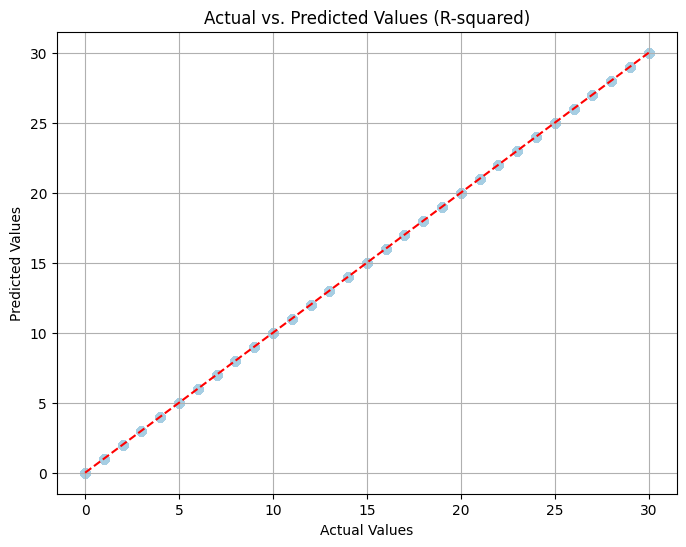

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of actual vs. predicted values 
plt.figure(figsize=(8, 6))
plt.scatter(BSHy_test, BSHy_predict, alpha=0.5)
plt.title('Actual vs. Predicted Values (R-squared)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
max_value = max(max(BSHy_test), max(BSHy_predict))
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.show()

#This graph shows that the predicted values stays along the reference line indicates that the model performed well.

### Repeat the same with a different parameter set and compare the result with (2)


## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [84]:
import xgboost
#import xgboost 
from xgboost import XGBRegressor
#import xgboostclassifier

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [85]:
clf = XGBRegressor( )
# create classification model clf with XGBClassifier
# objective: objective function is used for multi-class or binary-class classification, returning a probability score for each class. we are chossing the function as "multi:softprob" which is multi-class 
# num_class: used for multi-class classification to represents the number of classes in the dataset. _________________?
# max_depth: represents the maximum depth of each decision tree. We are choosing 2 here
# n_estimators: the number of trees to construct. We choose 100 here.
#learning_rate: the contribution of each tree. we choose 1 

### Train classifier on train data and explain what you did. (1.5) 

In [86]:
#Train the model
xgboost_fit = clf.fit(BSHX_train, BSHy_train)

### Test/fit classifier test data and explain what you did. (1.5)

In [87]:
BSHy_predict = xgboost_fit.predict(BSHX_test)

### Calculate accuracy and explain what you did. (1.5)

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#import accuracy calculation library for regression models
mae = mean_absolute_error(BSHy_test, BSHy_predict)

# Calculate RMSE
rmse = mean_squared_error(BSHy_test, BSHy_predict, squared=False)

# Calculate R-squared
r2 = r2_score(BSHy_test, BSHy_predict)

# Print the results
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

#Note that a low MAE,RMSE score and a high R-squared score indicates the performance of the model to be good.

MAE: 8.502393441292535e-06
RMSE: 1.3049944718253104e-05
R-squared: 0.9999999999977757


### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


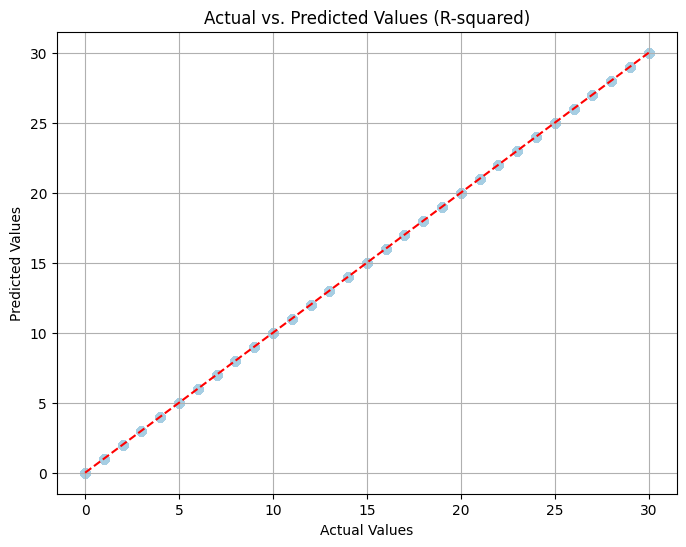

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of actual vs. predicted values 
plt.figure(figsize=(8, 6))
plt.scatter(BSHy_test, BSHy_predict, alpha=0.5)
plt.title('Actual vs. Predicted Values (R-squared)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
max_value = max(max(BSHy_test), max(BSHy_predict))
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.show()

#This graph shows that the predicted values stays along the reference line indicates that the model performed well.

### Repeat the same with a different parameter set and compare the result with (2)


## Bagging

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [90]:
from sklearn.ensemble import BaggingRegressor
#import  classification algorithm scikit-learn's generative ensemble method 

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [91]:
clf = BaggingRegressor()
#base_estimator: The base estimator to fit on random subsets of the dataset. we are choosing default estimator decision tree estimator.
#n_estimators: number of estimators in the sample for bagging. we are choosing 50 here.
#max_samples: The number of samples to draw from training dataset to train each base estimator. we use default value 1 here
#bootstrap: Whether samples are drawn with replacement. we choose true, sampling with replacement.
#bootstrap_features: Whether features are drawn with replacement. we choose default False - draw features without replacement
#random_state: for reproducible output across multiple function call in order to control the random resampling of the dataset. we put 1 here

### Train classifier on train data and explain what you did. (1.5) 

In [92]:
BSHy_predict = xgboost_fit.predict(BSHX_test)
bagging_fit = clf.fit(BSHX_train, BSHy_train)

### Test/fit classifier test data and explain what you did. (1.5)

In [93]:
BSHy_predict = bagging_fit.predict(BSHX_test)

### Calculate accuracy and explain what you did. (1.5)

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#import accuracy calculation library for regression models
mae = mean_absolute_error(BSHy_test, BSHy_predict)

# Calculate RMSE
rmse = mean_squared_error(BSHy_test, BSHy_predict, squared=False)

# Calculate R-squared
r2 = r2_score(BSHy_test, BSHy_predict)

# Print the results
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

#Note that a low MAE,RMSE score and a high R-squared score indicates the performance of the model to be good.

MAE: 0.0
RMSE: 0.0
R-squared: 1.0


### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


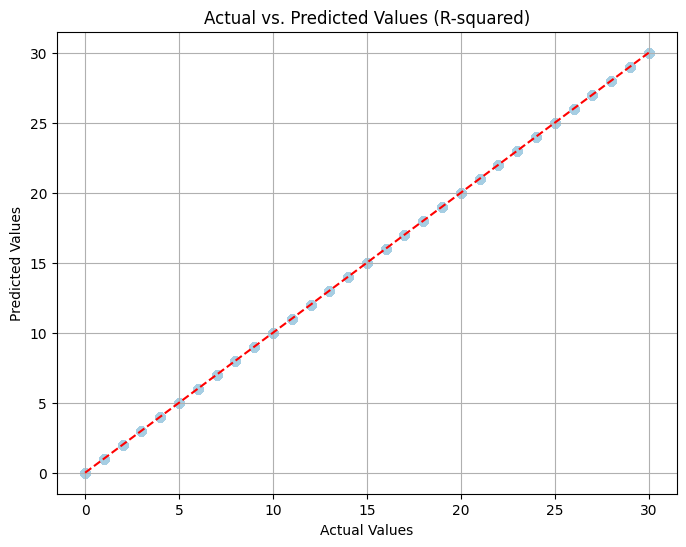

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of actual vs. predicted values 
plt.figure(figsize=(8, 6))
plt.scatter(BSHy_test, BSHy_predict, alpha=0.5)
plt.title('Actual vs. Predicted Values (R-squared)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
max_value = max(max(BSHy_test), max(BSHy_predict))
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.show()

#This graph shows that the predicted values stays along the reference line indicates that the model performed well.

### Repeat the same with a different parameter set and compare the result with (2)


# Bonus Question (5)
For all the given classifiers (Q3), evaluate the different parameter sets including (njobs, learning rate, etc).

## For boosting and bagging compare the tradeoff between njobs and learning rate. Plot the graph of different learning rates vs number of jobs(label the plot correctly. It should show title, x and y tik labels, and x and y axis labels). (1)

## Explain the graph in details, specifically describe the trade off between thelearning rate and n jobs. Also comment on the eolution of error for each combination(1 paragraph at least, 1.5).

## For bagging compare the tradeoff between the bootstrap features and max samples. Plot the graph of different combination of bootstrap features and max samples (label the plot correctly. It should show title, x and y tik labels, and x and y axis labels). (1)

## Explain the graph in details, specifically describe the trade off between bootstrap features and max samples (1 paragraph at least, 1.5) 